In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # using seaborn for data visualization
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

import glob
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [9]:
# Creating our data
eda_train_data = pd.read_csv('combined/classification/wesad-classification-eda-train-dataset.csv')
eda_validation_data = pd.read_csv('combined/classification/wesad-classification-eda-validation-dataset.csv')
eda_test_data = pd.read_csv('combined/classification/wesad-classification-eda-test-dataset.csv')

In [10]:
# Observing our train data
eda_train_data.head()

,MEAN,MAX,MIN,RANGE,KURT,SKEW,MEAN_1ST_GRAD,STD_1ST_GRAD,MEAN_2ND_GRAD,STD_2ND_GRAD,...,RMSC_YEO_JONSON,STD_1ST_GRAD_YEO_JONSON,RANGE_SQRT,RMSC_SQUARED,MEAN_2ND_GRAD_CUBE,INSC_APSC,condition,SSSQ class,SSSQ Label,condition label
0,4.953208,5.500412,4.472733,1.027679,-1.051808,0.194333,-9.373256e-07,0.005639,1.180740e-08,0.004914,...,1.007022,0.012908,1.013745,24.571444,1.646124e-24,42332.622712,stress,low,0,2
1,3.392998,3.784943,2.860641,0.924301,-1.128706,-0.125912,-2.702985e-06,0.006167,-1.952762e-08,0.005290,...,0.776923,0.019076,0.961406,11.542122,-7.446424e-24,61732.971743,stress,low,0,2
2,2.555056,3.635025,1.570129,2.064896,-1.455558,-0.203015,4.368737e-06,0.010968,3.151667e-07,0.009592,...,0.545086,0.015610,1.436974,6.825041,3.130551e-20,78616.631672,stress,high,2,2
3,5.533961,6.272125,4.922867,1.349258,-0.223507,0.736045,-1.877376e-06,0.005856,1.489548e-07,0.005060,...,5.748174,0.002704,1.161576,30.682322,3.304942e-21,37876.268234,amusement,high,2,1
4,2.352574,2.526474,2.104187,0.422287,1.371546,0.092147,-1.562209e-07,0.008295,2.270653e-08,0.007323,...,0.534023,0.043187,0.649836,5.534937,1.170718e-23,89258.549441,baseline,medium,1,0


In [11]:
# Observing our validation data
eda_validation_data.head()

,MEAN,MAX,MIN,RANGE,KURT,SKEW,MEAN_1ST_GRAD,STD_1ST_GRAD,MEAN_2ND_GRAD,STD_2ND_GRAD,...,RMSC_YEO_JONSON,STD_1ST_GRAD_YEO_JONSON,RANGE_SQRT,RMSC_SQUARED,MEAN_2ND_GRAD_CUBE,INSC_APSC,condition,SSSQ class,SSSQ Label,condition label
0,1.876461,2.186584,1.467133,0.719452,-1.505396,-0.067197,1.873743e-06,0.008511,8.265177e-08,0.007363,...,0.573469,0.081297,0.848205,3.543174,5.646204e-22,111215.742132,stress,low,0,2
1,7.838152,9.436035,6.621170,2.814865,-0.995253,0.527844,1.174745e-05,0.002995,1.271566e-08,0.002596,...,2.819197,0.000490,1.677756,61.991768,2.055969e-24,26552.104840,baseline,medium,1,0
2,3.708225,3.917694,3.402710,0.514984,5.325917,0.386521,-4.450480e-08,0.007135,-1.076290e-07,0.006071,...,3.819011,0.002877,0.717624,13.751172,-1.246773e-21,56629.874540,baseline,high,2,0
3,6.380973,7.420349,5.997086,1.423264,2.094564,1.896982,-5.509513e-06,0.003378,-3.178914e-08,0.002891,...,2.526209,0.000491,1.193006,40.829806,-3.212451e-23,32819.268135,baseline,medium,1,0
4,0.956370,1.108551,0.638580,0.469971,8.156851,1.366355,1.353309e-07,0.009686,-4.223415e-08,0.008473,...,0.446944,0.134051,0.685544,0.914829,-7.533403e-23,219535.657233,amusement,low,0,1


In [12]:
# Observing our testing data
eda_test_data.head()

,MEAN,MAX,MIN,RANGE,KURT,SKEW,MEAN_1ST_GRAD,STD_1ST_GRAD,MEAN_2ND_GRAD,STD_2ND_GRAD,...,RMSC_YEO_JONSON,STD_1ST_GRAD_YEO_JONSON,RANGE_SQRT,RMSC_SQUARED,MEAN_2ND_GRAD_CUBE,INSC_APSC,condition,SSSQ class,SSSQ Label,condition label
0,6.099798,6.275940,5.789948,0.485992,-0.513806,-0.403873,-3.950936e-07,0.005510,2.193451e-07,0.004770,...,23.029645,0.004680,0.697132,37.208351,1.055319e-20,34426.617129,baseline,low,0,0
1,3.038934,3.248596,2.795029,0.453568,0.842551,0.744031,-7.102603e-07,0.005891,-4.586719e-08,0.005111,...,0.230597,0.101563,0.673474,9.236098,-9.649537e-23,69095.852475,amusement,low,0,1
2,2.896590,3.068924,2.565384,0.503540,4.531298,1.620528,0.000000e+00,0.006413,8.492243e-08,0.005537,...,0.230504,0.149447,0.709606,8.390721,6.124451e-22,72494.822685,baseline,high,2,0
3,6.313392,6.465530,5.978394,0.487137,6.546867,0.517125,1.516796e-07,0.005291,2.452305e-08,0.004609,...,24.432392,0.004522,0.697952,39.859181,1.474768e-23,33262.407284,amusement,low,0,1
4,11.736492,12.067032,11.435318,0.631714,-1.525898,-0.120096,-9.972709e-07,0.003165,-1.362392e-09,0.002652,...,0.864782,0.001188,0.794804,137.769514,-2.528751e-27,17889.758685,amusement,medium,1,1


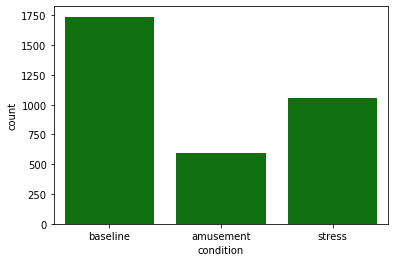

In [13]:
# Plotting our training data distribution
sns.countplot(eda_train_data['condition'], color='green')
# Plotting our validation data distribution
sns.countplot(eda_validation_data['condition'], color='green')

# Plotting our test data distribution
sns.countplot(eda_test_data['condition'], color='green')


In [30]:
# Counting our training data
eda_train_data.count()

# Counting our validation data
eda_validation_data.count()

# Counting our testing data 
eda_test_data.count()

MEAN                        3395
MAX                         3395
MIN                         3395
RANGE                       3395
KURT                        3395
SKEW                        3395
MEAN_1ST_GRAD               3395
STD_1ST_GRAD                3395
MEAN_2ND_GRAD               3395
STD_2ND_GRAD                3395
ALSC                        3395
INSC                        3395
APSC                        3395
RMSC                        3395
subject id                  3395
MEAN_LOG                    3395
INSC_LOG                    3395
APSC_LOG                    3395
RMSC_LOG                    3395
RANGE_LOG                   3395
ALSC_LOG                    3395
MIN_LOG                     3395
MEAN_1ST_GRAD_LOG           3395
MEAN_2ND_GRAD_LOG           3395
MIN_LOG_LOG                 3395
MEAN_1ST_GRAD_LOG_LOG       3395
MEAN_2ND_GRAD_LOG_LOG       3395
APSC_LOG_LOG                3395
ALSC_LOG_LOG                3395
APSC_BOXCOX                 3395
RMSC_BOXCO

In [31]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.title('Scatter and Density Plot')
    plt.show()

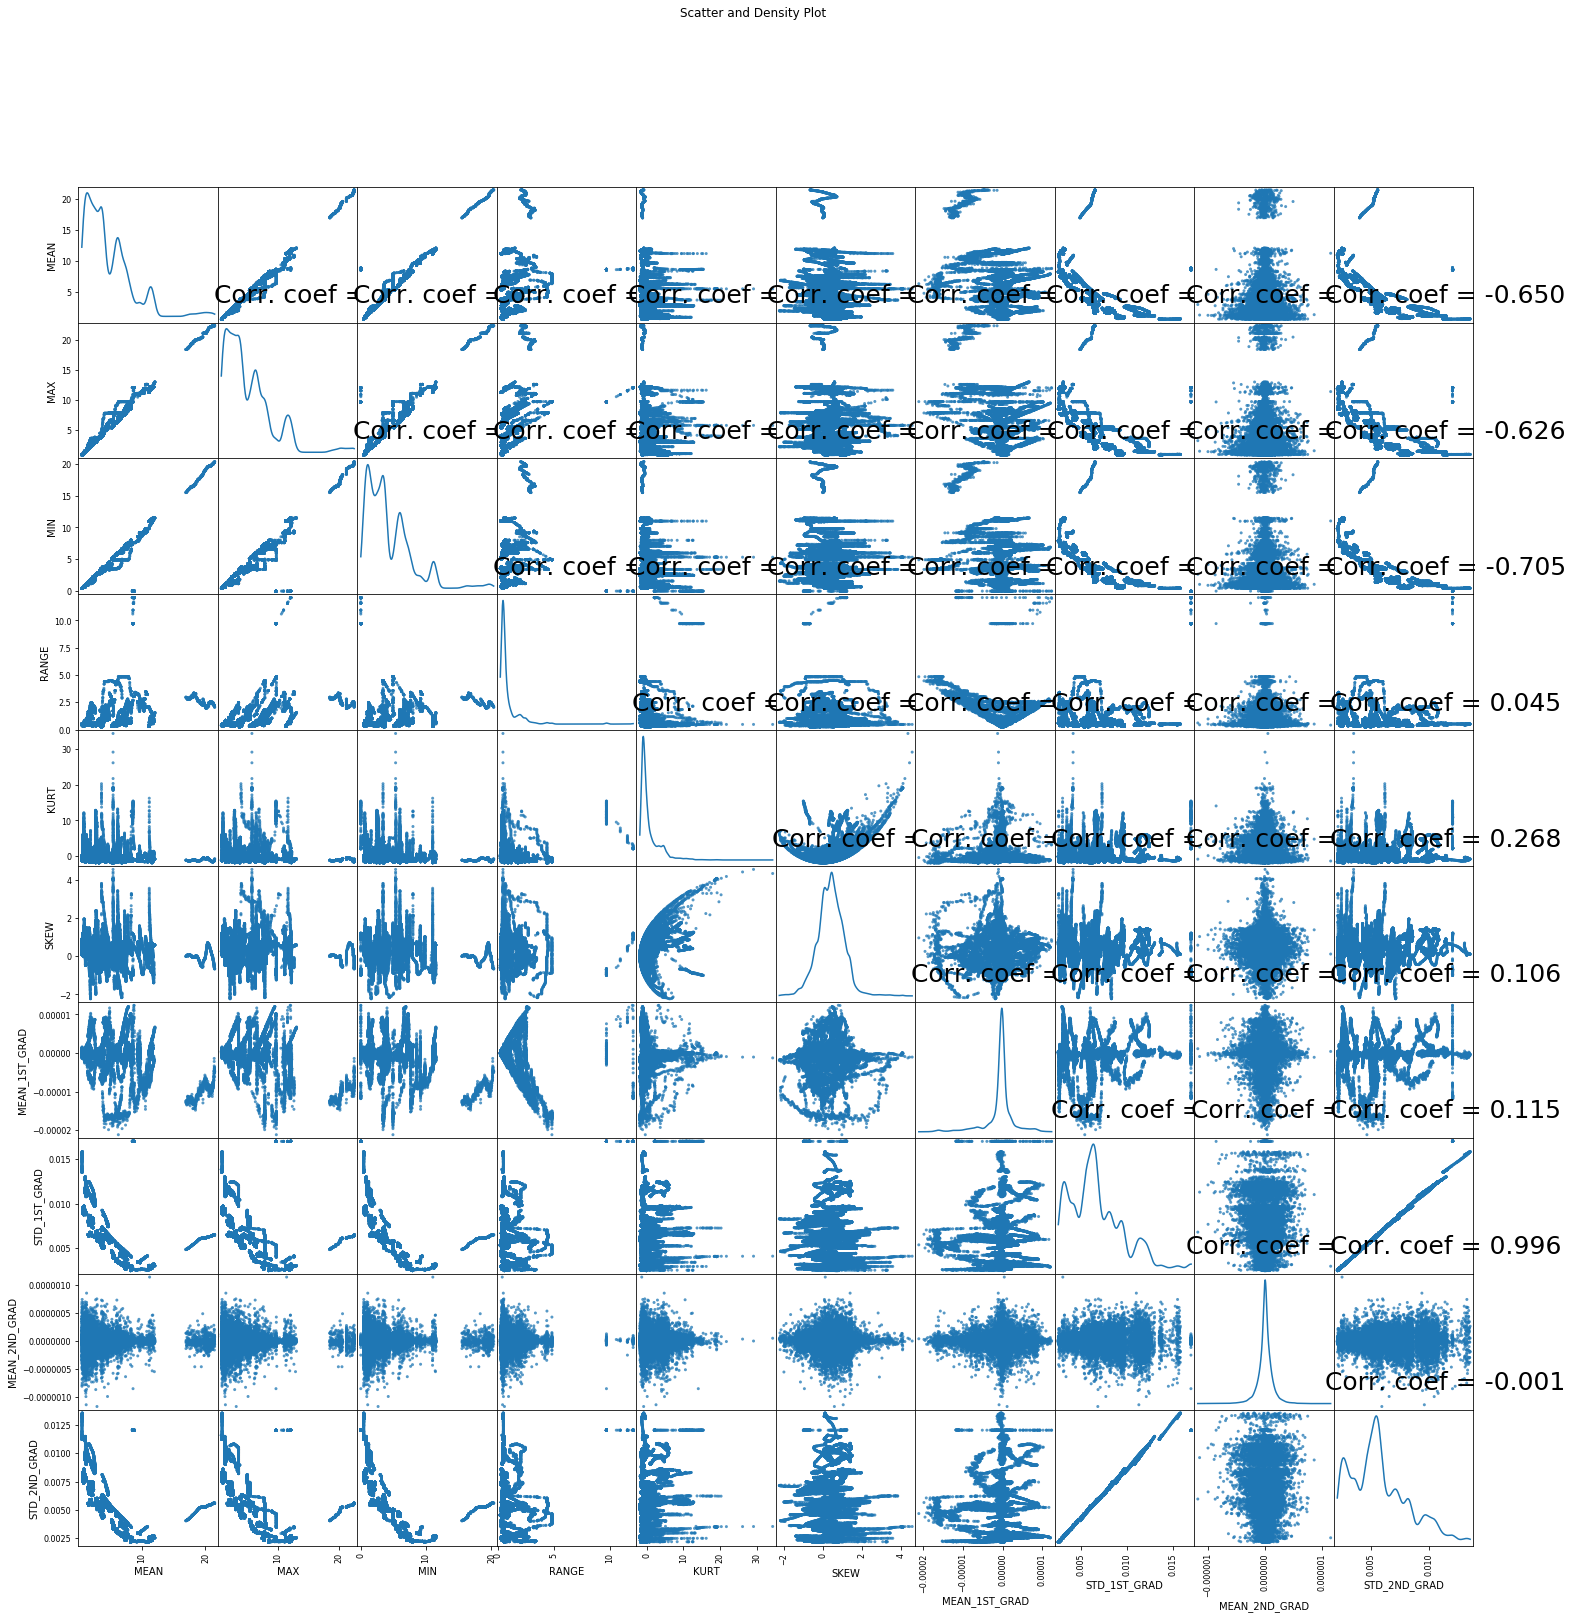

In [34]:
plotScatterMatrix(eda_train_data, 25, 25)

In [33]:
# Finding correlations in our data
correlations = eda_train_data.corr(method='pearson')
correlations

,MEAN,MAX,MIN,RANGE,KURT,SKEW,MEAN_1ST_GRAD,STD_1ST_GRAD,MEAN_2ND_GRAD,STD_2ND_GRAD,...,MAX_YEO_JONSON,MEAN_1ST_GRAD_YEO_JONSON,RMSC_YEO_JONSON,STD_1ST_GRAD_YEO_JONSON,RANGE_SQRT,RMSC_SQUARED,MEAN_2ND_GRAD_CUBE,INSC_APSC,SSSQ Label,condition label
MEAN,1.000000,0.993663,0.976657,0.368308,-0.223441,-0.148705,-0.302397,-0.620654,-0.000784,-0.650197,...,0.281546,-0.345291,0.219019,-0.487756,0.443910,0.922925,0.022967,-0.693684,0.072189,0.282104
MAX,0.993663,1.000000,0.957915,0.448410,-0.230332,-0.141011,-0.338838,-0.594782,-0.000581,-0.626178,...,0.330722,-0.377931,0.215840,-0.500794,0.530670,0.915810,0.022456,-0.692709,0.108782,0.312468
MIN,0.976657,0.957915,1.000000,0.172962,-0.260051,-0.112522,-0.262437,-0.691506,-0.000241,-0.704523,...,0.253737,-0.306103,0.224673,-0.464416,0.278349,0.904856,0.024589,-0.676775,0.029311,0.236158
RANGE,0.368308,0.448410,0.172962,1.000000,0.019442,-0.133461,-0.345433,0.112417,-0.001241,0.045225,...,0.344677,-0.343600,0.040995,-0.272208,0.954091,0.324755,0.000486,-0.269458,0.281981,0.336782
KURT,-0.223441,-0.230332,-0.260051,0.019442,1.000000,0.498039,0.046477,0.281916,-0.009257,0.267532,...,-0.071904,0.054149,-0.069760,0.379565,-0.092169,-0.171654,-0.016137,0.286058,-0.027924,-0.198655
SKEW,-0.148705,-0.141011,-0.112522,-0.133461,0.498039,1.000000,0.115896,0.095713,-0.000663,0.106365,...,0.008933,0.117213,-0.047489,0.225251,-0.143091,-0.125520,-0.008011,0.209361,-0.052433,-0.189014
MEAN_1ST_GRAD,-0.302397,-0.338838,-0.262437,-0.345433,0.046477,0.115896,1.000000,0.109716,0.007101,0.115443,...,-0.347800,0.981786,-0.088345,0.114139,-0.375823,-0.356111,-0.006439,0.127549,-0.068043,-0.159014
STD_1ST_GRAD,-0.620654,-0.594782,-0.691506,0.112417,0.281916,0.095713,0.109716,1.000000,-0.000208,0.995635,...,-0.250939,0.112848,-0.224263,0.360695,0.009784,-0.378789,-0.031896,0.752660,0.009832,-0.142502
MEAN_2ND_GRAD,-0.000784,-0.000581,-0.000241,-0.001241,-0.009257,-0.000663,0.007101,-0.000208,1.000000,-0.000644,...,0.003270,0.007103,0.002306,-0.014215,-0.000540,-0.003903,0.607837,-0.003726,0.000214,-0.000887
STD_2ND_GRAD,-0.650197,-0.626178,-0.704523,0.045225,0.267532,0.106365,0.115443,0.995635,-0.000644,1.000000,...,-0.257052,0.120186,-0.227715,0.380240,-0.042090,-0.399493,-0.032452,0.777022,-0.004856,-0.160865
